# <a id='toc1_'></a>[Advanced Matplotlib](#toc0_)

We cover several different types of more advanced charts or graphics for data visulaisation using Matplotlib library in python. For the more basic, more often used plots, look at the first notebook on [Matplotlib Basics](tps://github.com/pavsingh7/Matplotlib/blob/main/matplot_cs.ipynb).



[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pavsingh7/Matplotlib/blob/master/matplot_adv.ipynb)

**Table of contents**<a id='toc0_'></a>    
- [Correlation Plot](#toc2_)    
- [Heat Maps](#toc3_)    
- [3D Plots](#toc4_)    
- [2D Contour Plots](#toc5_)    
- [Bar Plots](#toc6_)    
- [Scatterplots](#toc7_)    
- [Violin Plots](#toc8_)    
- [Subplots](#toc9_)    
- [ Stylesheets](#toc10_)    
- [Plots for Publications](#toc11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np



***
# <a id='toc2_'></a>[Correlation Plot](#toc0_)

A correlation plot is a graphical representation of the relationship between two or more variables. It shows the correlation coefficient between each pair of variables, which is a measure of how strongly the two variables are related. The correlation coefficient can range from -1 to 1. 

- -1 indicates a strong negative correlation, meaning that as one variable increases, the other decreases.
- 1 indicates a strong positive correlation, meaning that as one variable increases, the other also increases.
- 0 indicates that there is no correlation between the two variables.

To interpret a correlation plot, you should look for patterns in the plot, such as clusters of points with similar slopes, or outliers that deviate significantly from the other points. The size and direction of the correlation coefficients give insight into the strength and direction of the relationship between the variables.

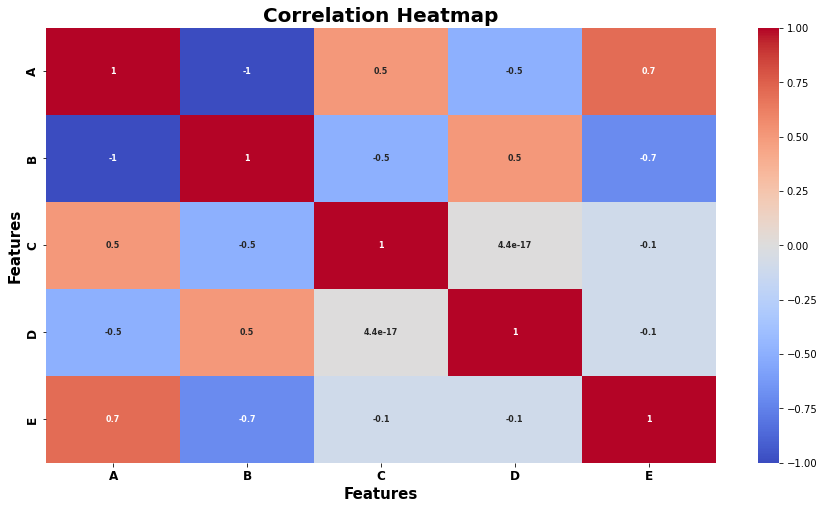

In [6]:
# Sample data
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [1, 3, 5, 2, 4],
    'D': [5, 2, 4, 1, 3],
    'E': [3, 1, 2, 4, 5]
}

# Create dataframe
df = pd.DataFrame(data)

# Compute the correlation matrix
corr = df.corr()

# Set figure size
plt.figure(figsize=(15, 8))

# Plot heatmap and adjust size of annotations in plot
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 8, "weight": "bold"})

# Set title, x and y axis labels, font size and weight
plt.title("Correlation Heatmap", fontsize=20, fontweight='bold')
plt.xlabel("Features", fontsize=15, fontweight='bold')
plt.ylabel("Features", fontsize=15, fontweight='bold')

# set semibold ticks for both x and y axis
plt.xticks(fontweight='semibold', fontsize=12)
plt.yticks(fontweight='semibold', fontsize=12)


# Show plot
plt.show()


***
# <a id='toc3_'></a>[Heat Maps](#toc0_)



In [14]:
np.random.randn(1000, 2)

array([[ 0.0860913 , -0.97085189],
       [-0.23524287,  0.79255757],
       [-1.00823475,  0.36580946],
       ...,
       [-1.02567614,  1.40302535],
       [ 0.21716188,  0.65512561],
       [ 0.45213332, -0.19166405]])

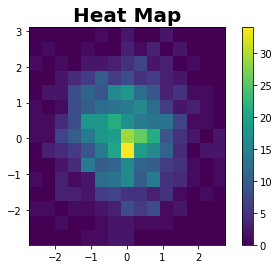

In [38]:
# Create the data
data = np.random.randn(1000, 2)

# Compute the histogram2d
hist, x_edges, y_edges = np.histogram2d(data[:, 0], data[:, 1], bins=15)

# Plot the heatmap
fig, ax = plt.subplots()
im = ax.imshow(hist, origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
plt.colorbar(im)
ax.set_title("Heat Map", fontsize=20, fontweight='bold')
plt.show()


This will create a heat map showing the density of points in the 2D data set. The `histogram2d` function computes a 2D histogram of the data, where the `x` and `y` values are divided into bins. The resulting histogram is then displayed as a heat map, with color representing the density of points in each bin. The extent argument is used to set the limits of the `x` and `y` axes.

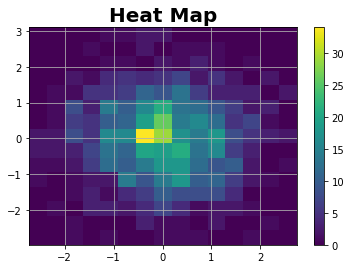

In [41]:
plt.hist2d(data[:, 0], data[:, 1], bins=15)
plt.colorbar()
plt.grid()
plt.title("Heat Map", fontsize=20, fontweight='bold')
plt.show()

***
# <a id='toc4_'></a>[3D Plots](#toc0_)

We shall make several 3D plots:

- 3D Scatter Plot
- 3D Contour Plot

Make sure to run: ```from mpl_toolkits.mplot3d import Axes3D```


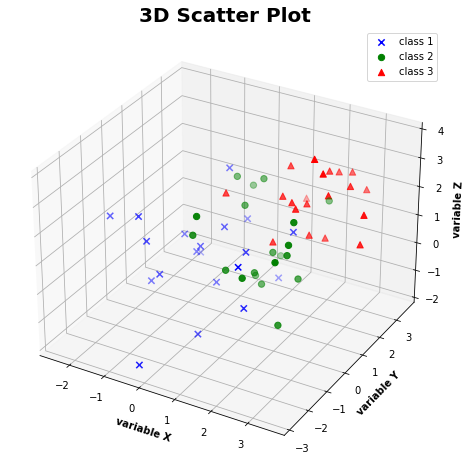

In [51]:
# Generate some 3D sample data
np.random.seed(123)
x = np.array([0,0,0]) # mean vector
y = np.array([[1,0,0],[0,1,0],[0,0,1]]) # covariance matrix
class1_sample = np.random.multivariate_normal(x, y, 20)
class2_sample = np.random.multivariate_normal(x + 1, y, 20)
class3_sample = np.random.multivariate_normal(x + 2, y, 20)

# create figure and plot space
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

# create scatter plots
ax.scatter(class1_sample[:,0], class1_sample[:,1], class1_sample[:,2], 
           marker='x', color='blue', s=40, label='class 1')
ax.scatter(class2_sample[:,0], class2_sample[:,1], class2_sample[:,2], 
           marker='o', color='green', s=40, label='class 2')
ax.scatter(class3_sample[:,0], class3_sample[:,1], class3_sample[:,2], 
           marker='^', color='red', s=40, label='class 3')

# set axis labels, sizes and styles
ax.set_xlabel('variable X',fontsize=10, fontweight='bold')
ax.set_ylabel('variable Y',fontsize=10, fontweight='bold')
ax.set_zlabel('variable Z',fontsize=10, fontweight='bold')

# add title
plt.title('3D Scatter Plot', fontsize=20, fontweight= 'bold')

# Add legend
ax.legend(loc='upper right')

plt.show()


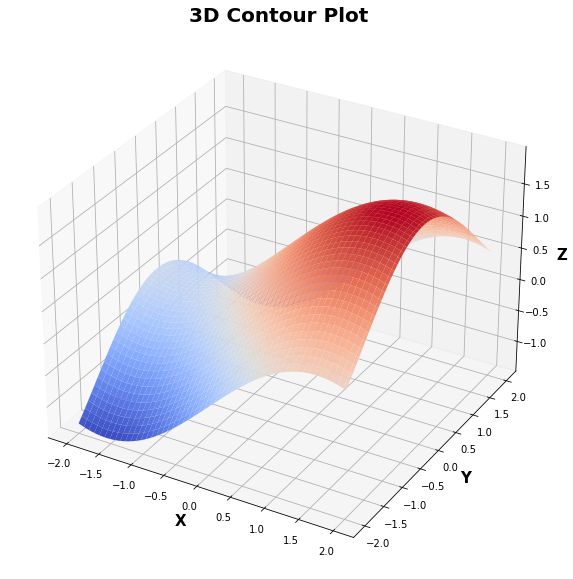

In [66]:
# Generate data for the contour plot
x, y = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)

# Plot the 3D contour plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')

# Add axis labels
ax.set_xlabel("X", fontsize=15, fontweight='bold')
ax.set_ylabel("Y", fontsize=15, fontweight='bold')
ax.set_zlabel("Z", fontsize=15, fontweight='bold')

# Add title
ax.set_title("3D Contour Plot", fontsize=20, fontweight='bold')

plt.show()


`linspace` is a function in the NumPy library in Python, which is used to generate a 1D array of evenly spaced values between a start and end point.



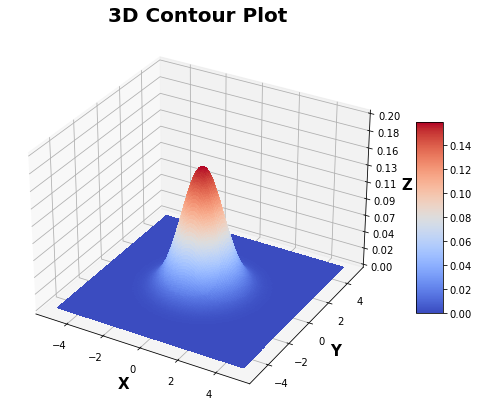

In [112]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Define the mean and covariance of the distribution
mean = [0, 0]
cov = [[1, 0], [0, 1]]

# Generate the data using the multivariate_normal function
x = np.linspace(-5, 5, 200)
y = x
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = multivariate_normal.pdf(pos, mean=mean, cov=cov)

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D contour plot
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)

# Set the z-axis limits
ax.set_zlim(0, 0.2)

# Set the z-axis locator and formatter
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

# Add a colorbar
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

# axis labels
ax.set_xlabel("X", fontsize=15, fontweight='bold')
ax.set_ylabel("Y", fontsize=15, fontweight='bold')
ax.set_zlabel("Z", fontsize=15, fontweight='bold')

# Add title
ax.set_title("3D Contour Plot", fontsize=20, fontweight='bold')

# Show the plot
plt.show()


The code first creates a figure with a 3D projection and sets the size of the figure to (10, 7). The data for the plot is generated using numpy's `linspace` function to create 200 evenly spaced values between -5 and 5 for the `x` and `y` axis. Then, the function `np.meshgrid` creates a grid of `x` and `y` coordinates. The `scipy.stats` module's `multivariate_normal` function is then used to generate `Z` data using the `X` and `Y` coordinates.

Next, the function `plot_surface` is used to plot the surface of the multivariate normal distribution with the data `X`, `Y`, and `Z`. The plot is colored using the `coolwarm` color map from `matplotlib.cm`.

The z-axis is then set to a limit of 0 to 0.2 and the z-axis labels are formatted to 2 decimal places. A `colorbar` is added to the right side of the plot to show the color scale.

***
# <a id='toc5_'></a>[2D Contour Plots](#toc0_)

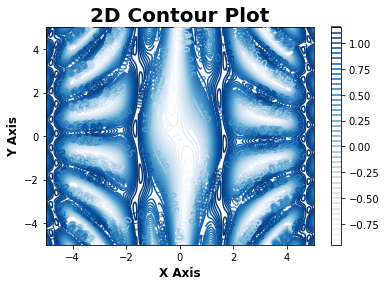

In [10]:
# create data
def f(x, y):
    return np.sin(x)**10 + np.cos(10 + y * x) * np.cos(x) + np.random.rand(1,1)

x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

# create grid
X, Y = np.meshgrid(x, y)

Z = f(X, Y) # Z = np.sin(x)**10 + np.cos(10 + y * x) * np.cos(x) + e

# simple contour plot
fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z, 50, cmap='Blues')
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title("2D Contour Plot", fontsize=20, fontweight='bold')
ax.set_xlabel("X Axis", fontsize=12, fontweight='semibold')
ax.set_ylabel("Y Axis", fontsize=12, fontweight='semibold')
cbar = fig.colorbar(cs)


plt.show()


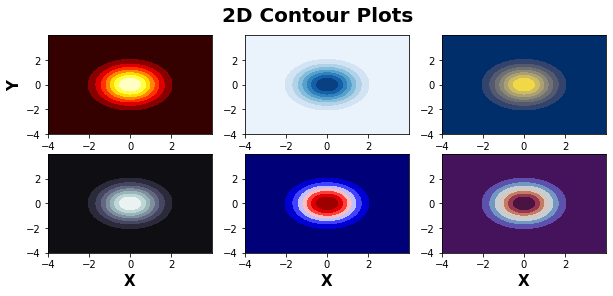

In [100]:
from scipy.stats import multivariate_normal

# Define the mean and covariance of the bivariate Gaussian distribution
mean = [0, 0]
cov = [[1, 0], [0, 1]]

# Generate grid points for the 2D plot
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.dstack((x, y))

# Compute the probability density function (pdf) of the bivariate Gaussian distribution
rv = multivariate_normal(mean=mean, cov=cov)
pdf = rv.pdf(pos)

# Plot the 2D contour plot - plot 1 ----
# Create the figure with a specified size
fig = plt.figure(figsize=(10, 4))
plt.subplot(2, 3, 1)
plt.contourf(x, y, pdf, cmap='hot')

# Add axis labels
plt.xlabel("X", fontsize=15, fontweight='bold')
plt.ylabel("Y", fontsize=15, fontweight='bold')

# Plot the 2D contour plot - plot 2 ----
plt.subplot(2, 3, 2)
plt.contourf(x, y, pdf, cmap='Blues')

# Plot the 2D contour plot - plot 3 ----
plt.subplot(2, 3, 3)
plt.contourf(x, y, pdf, cmap='cividis')

# Plot the 2D contour plot - plot 4 ----
plt.subplot(2, 3, 4)
plt.contourf(x, y, pdf, cmap='bone')
plt.xlabel("X", fontsize=15, fontweight='bold')

# Plot the 2D contour plot - plot 5 ----
plt.subplot(2, 3, 5)
plt.contourf(x, y, pdf, cmap='seismic')
plt.xlabel("X", fontsize=15, fontweight='bold')

# Plot the 2D contour plot - plot 6 ----
plt.subplot(2, 3, 6)
plt.contourf(x, y, pdf, cmap='twilight_shifted')
plt.xlabel("X", fontsize=15, fontweight='bold')


# Add a title for the entire figure
plt.suptitle('2D Contour Plots', fontsize=20, fontweight='bold')

plt.show()

***
# <a id='toc6_'></a>[Bar Plots](#toc0_)

We make bar plots with some error bars. 

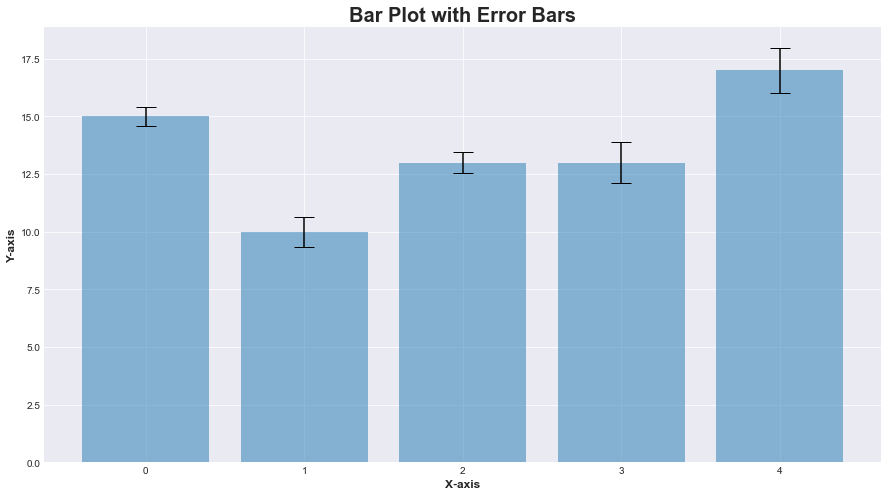

In [12]:
import matplotlib.style as style

# Use a random stylesheet
style.use('seaborn-darkgrid')

# Generate data
np.random.seed(0)
x = np.arange(5)
y = np.random.randint(10, 20, size=5)
y_err = np.random.rand(5)

# Plot the bar graph with error bars
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x, y, yerr=y_err, align='center', alpha=0.5, ecolor='black', capsize=10)

# Add title and axis labels
ax.set_title("Bar Plot with Error Bars", fontsize=20, fontweight='bold')
ax.set_xlabel("X-axis", fontsize=12, fontweight='semibold')
ax.set_ylabel("Y-axis", fontsize=12, fontweight='semibold')

plt.show()


Error bars are graphical representation of uncertainty in data. They show the variability of the data and give us a range in which the true value is likely to fall. In bar plots, error bars are usually plotted as vertical lines on top of the bar graph to show the variability of the data points.

***
# <a id='toc7_'></a>[Scatterplots](#toc0_)


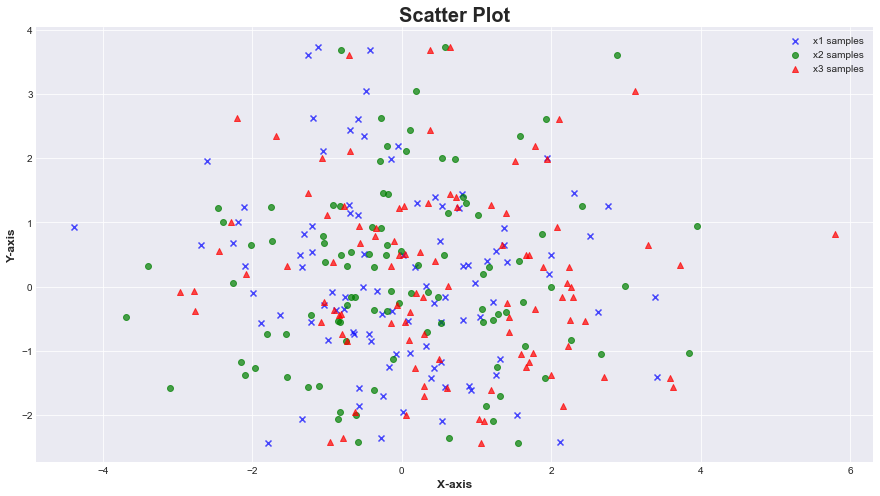

In [19]:
# Generating a data from MVN - given mean and covariance 
np.random.seed(4312)
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])

x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
x2_samples = np.random.multivariate_normal(mu_vec1+0.2, cov_mat1+0.2, 100)
x3_samples = np.random.multivariate_normal(mu_vec1+0.4, cov_mat1+0.4, 100)

# create plot
fig, ax = plt.subplots(figsize=(15,8))
    
# scatter plot
plt.scatter(x1_samples[:,0], x1_samples[:,1], marker='x', 
            color='blue', alpha=0.7, label='x1 samples')
plt.scatter(x2_samples[:,0], x1_samples[:,1], marker='o', 
            color='green', alpha=0.7, label='x2 samples')
plt.scatter(x3_samples[:,0], x1_samples[:,1], marker='^', 
            color='red', alpha=0.7, label='x3 samples')

# Add title and axis labels
ax.set_title("Scatter Plot", fontsize=20, fontweight='bold')
ax.set_xlabel("X-axis", fontsize=12, fontweight='semibold')
ax.set_ylabel("Y-axis", fontsize=12, fontweight='semibold')
plt.legend(loc='upper right')

plt.show()


/var/folders/y5/7wlh6jzj03185p7x7ggqb_280000gn/T/ipykernel_11686/3996053091.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(scatter1, ax=ax)


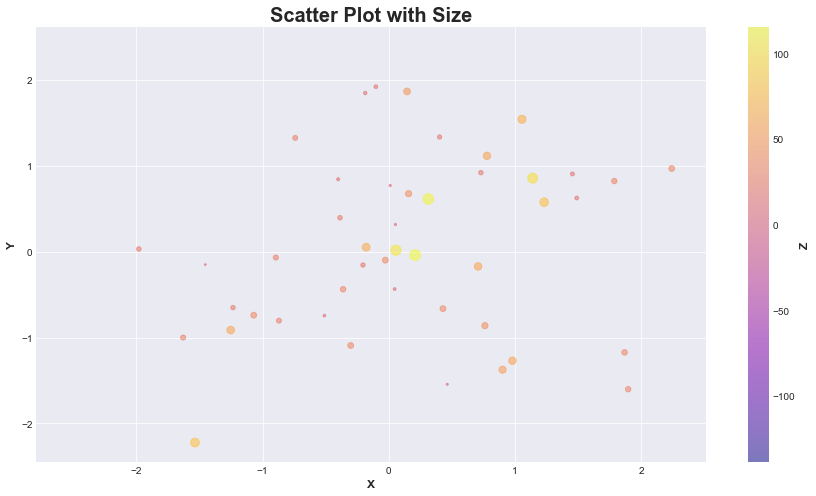

In [127]:
# Generate data
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
z = np.random.normal(0, 1, 100) * 50

# create plot
fig, ax = plt.subplots(figsize=(15,8))
    
# scatter plot
scatter1 = plt.scatter(x, y, marker='o', c=z, cmap='plasma', s=z, alpha=0.5, label = "Sample 1")

# Add color bar
cbar = plt.colorbar(scatter1, ax=ax)
cbar.set_label('Z', size=12, weight='semibold')

# Add title, axis labels and adjust the size of the plot
plt.title("Scatter Plot with Size", size=20, weight='bold')
plt.xlabel("X", size=12, weight='semibold')
plt.ylabel("Y", size=12, weight='semibold')
plt.show()



/var/folders/y5/7wlh6jzj03185p7x7ggqb_280000gn/T/ipykernel_11686/367626581.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(scatter1, ax=ax)


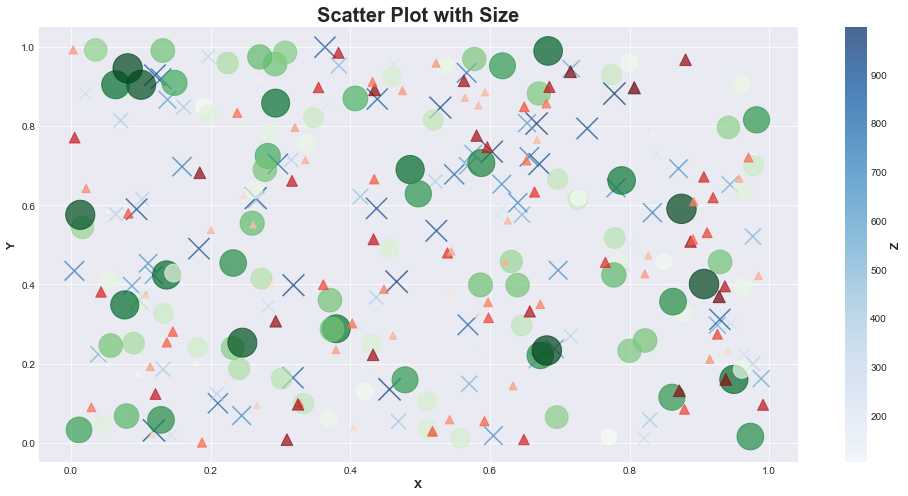

In [123]:
# Generate data
np.random.seed(0)

# sample 1
x1 = np.random.rand(100,1)
y1 = np.random.rand(100,1)
z1 = np.random.randint(low=100, high=1001, size=100)

# sample 2
x2 = np.random.rand(100,1)
y2 = np.random.rand(100,1)
z2 = np.random.randint(low=500, high=1750, size=100)

# sample 2
x3 = np.random.rand(100,1)
y3 = np.random.rand(100,1)
z3 = np.random.randint(low=30, high=300, size=100)

# create plot
fig, ax = plt.subplots(figsize=(17,8))
    

# scatter plot
scatter1 = plt.scatter(x1, y1, marker='x', s=z1/2, c=z1, cmap='Blues', alpha=0.7, label='X1 samples')
scatter2 = plt.scatter(x2, y2, marker='o', s=z2/2, c=z2, cmap='Greens', alpha=0.7, label='X2 samples')
scatter3 = plt.scatter(x3, y3, marker='^', s=z3/2, c=z3, cmap='Reds', alpha=0.7, label='X3 samples')

# Add color bar
cbar = plt.colorbar(scatter1, ax=ax)
cbar.set_label('Z', size=12, weight='semibold')

# Add title, axis labels and adjust the size of the plot
plt.title("Scatter Plot with Size", size=20, weight='bold')
plt.xlabel("X", size=12, weight='semibold')
plt.ylabel("Y", size=12, weight='semibold')
plt.show()


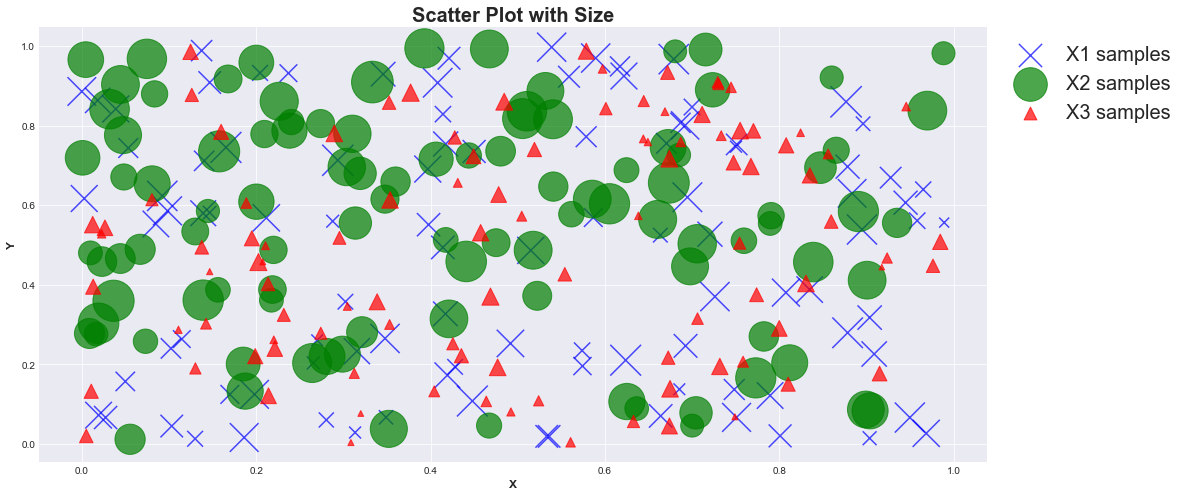

In [121]:
# Generate data
np.random.seed(1)

# sample 1
x1 = np.random.rand(100,1)
y1 = np.random.rand(100,1)
z1 = np.random.randint(low=100, high=1001, size=100)

# sample 2
x2 = np.random.rand(100,1)
y2 = np.random.rand(100,1)
z2 = np.random.randint(low=500, high=1750, size=100)

# sample 2
x3 = np.random.rand(100,1)
y3 = np.random.rand(100,1)
z3 = np.random.randint(low=30, high=300, size=100)

# create plot
fig, ax = plt.subplots(figsize=(17,8))
    

# scatter plot
plt.scatter(x1, y1, marker='x', s=z1, color='blue', alpha=0.7, label='X1 samples')
plt.scatter(x2, y2, marker='o', s=z2, color='green', alpha=0.7, label='X2 samples')
plt.scatter(x3, y3, marker='^', s=z3, color='red', alpha=0.7, label='X3 samples')


# Add title, axis labels and adjust the size of the plot
plt.title("Scatter Plot with Size", size=20, weight='bold')
plt.xlabel("X", size=12, weight='semibold')
plt.ylabel("Y", size=12, weight='semibold')

# Add a legend to the plot and move it
# Create the legend
plt.legend(loc='upper left', bbox_to_anchor=(1.005, 1), fontsize=20)

plt.show()


***
# <a id='toc8_'></a>[Violin Plots](#toc0_)

Violin plots are a type of data visualization that combines aspects of both box plots and kernel density plots. They show the distribution of the data by plotting a kernel density estimate along with a box plot inside the violin shape. The violin shape also has a wider region in the middle, representing the higher density of the data, and a thin region on the edges, indicating lower density.

- Look at the **width** of the violin: The width of the violin indicates the density of the data at that point. Wide regions indicate high density, while thin regions indicate low density.
- Observe the **overall shape** of the violin: The shape of the violin can help determine if the data is symmetrical or skewed in any direction

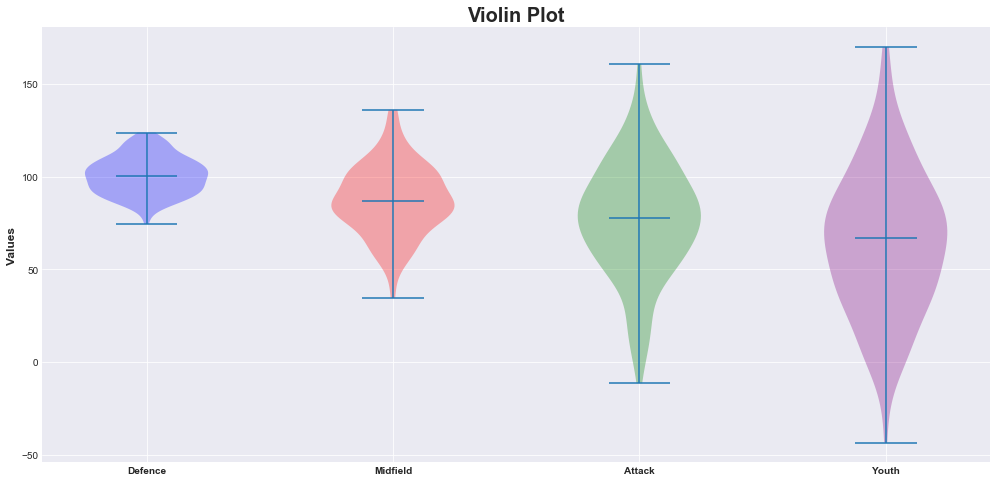

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# set a style sheet
plt.style.use('seaborn-darkgrid')

# generate random data
np.random.seed(0)
data1 = np.random.normal(100, 10, 200)
data2 = np.random.normal(90, 20, 200)
data3 = np.random.normal(80, 30, 200)
data4 = np.random.normal(70, 40, 200)

# create a list of data sets
data = [data1, data2, data3, data4]

# create violin plots
fig, ax = plt.subplots(figsize=(17, 8))
violin = ax.violinplot(data, showmedians=True, showextrema=True)

# set colors and labels for each violin plot
violin['bodies'][0].set_facecolor('blue')
violin['bodies'][1].set_facecolor('red')
violin['bodies'][2].set_facecolor('green')
violin['bodies'][3].set_facecolor('purple')

# set labels for each violin plot
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Defence', 'Midfield', 'Attack', 'Youth'], weight = 'semibold')

# add title and axis labels
plt.title("Violin Plot", size=20, weight='bold')
plt.xlabel("", size=12, weight='semibold')
plt.ylabel("Values", size=12, weight='semibold')

plt.show()


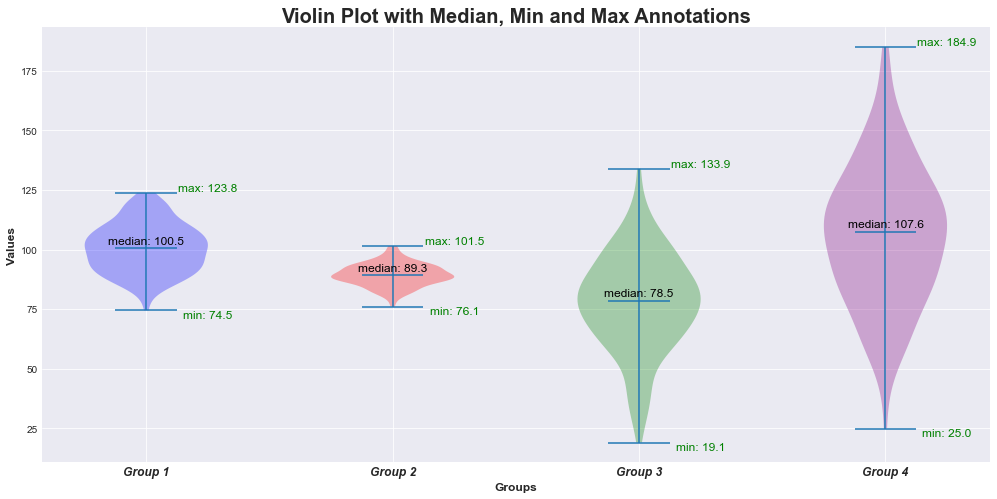

In [170]:
import matplotlib.pyplot as plt
import numpy as np

# Use a style sheet
plt.style.use('seaborn-darkgrid')

# Generate data
np.random.seed(0)
data = [np.random.normal(100, 10, 200),
        np.random.normal(90, 5, 200),
        np.random.normal(80, 20, 200),
        np.random.normal(110, 30, 200)]

# Create the violin plots
fig, ax = plt.subplots(figsize=(17, 8))
parts = ax.violinplot(data, showmedians=True, showextrema=True)

# set colors and labels for each violin plot
parts['bodies'][0].set_facecolor('blue')
parts['bodies'][1].set_facecolor('red')
parts['bodies'][2].set_facecolor('green')
parts['bodies'][3].set_facecolor('purple')

# Add the median value annotations
median_labels = [f"median: {np.median(d):.1f}" for d in data]
for i, label in enumerate(median_labels):
    x = i + 1
    y = np.median(data[i])+1
    ax.text(x, y, label, ha='center', va='bottom', fontsize=12, color='black')

# Add the minimum and maximum value annotations
min_labels = [f"min: {np.min(d):.1f}" for d in data]
for i, label in enumerate(min_labels):
    x = i + 1.25
    y = np.min(data[i])
    ax.text(x, y, label, ha='center', va='top', fontsize=12, color='green')

max_labels = [f"max: {np.max(d):.1f}" for d in data]
for i, label in enumerate(max_labels):
    x = i + 1.25
    y = np.max(data[i])
    ax.text(x, y, label, ha='center', va='bottom', fontsize=12, color='green')

# Add title and axis labels
plt.title("Violin Plot with Median, Min and Max Annotations", size=20, weight='bold')
plt.xlabel("Groups", size=12, weight='semibold')
plt.ylabel("Values", size=12, weight='semibold')

# Format the x axis ticks
plt.xticks(np.arange(1, 5), ['Group 1', 'Group 2', 'Group 3', 'Group 4'], 
           fontsize=12, fontstyle='italic', fontweight='semibold')

# Show the plot
plt.show()


***
# <a id='toc9_'></a>[Subplots](#toc0_)

We shall show how to handle subplots and, specifically, how to show plots side by side and arrange them to your liking. 

    plt.subplot(rows, columns, index)

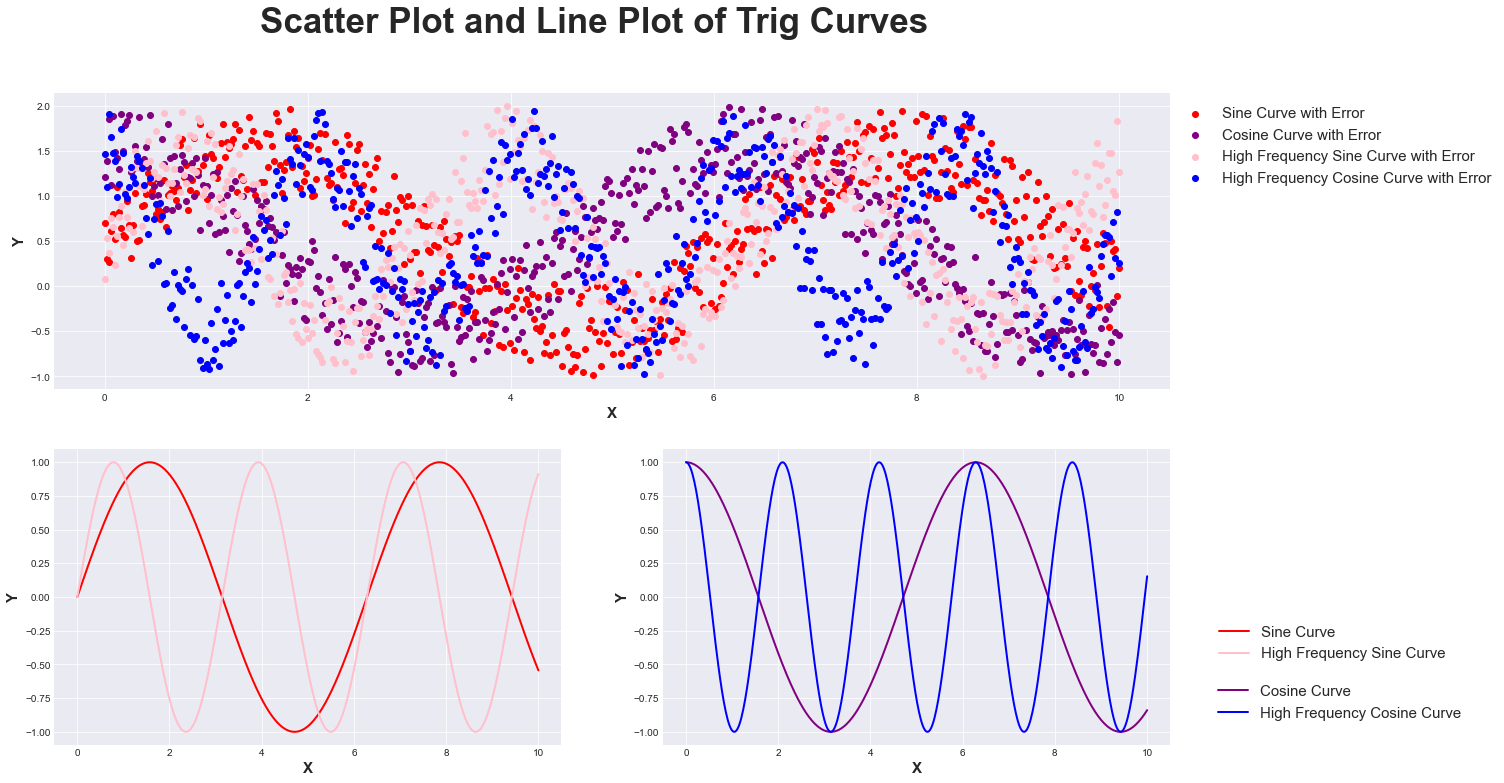

In [258]:
# Set the seed for the random number generator
np.random.seed(123)

# Simulate random data for three different groups
# Generate data
x = np.linspace(0, 10, num=500)
y1_err = np.sin(x)+np.random.random(500)
y2_err = np.cos(x)+np.random.random(500)
y3_err = np.sin(2 * x)+np.random.random(500)
y4_err = np.cos(3*x)+np.random.random(500)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(2 * x)
y4 = np.cos(3*x)

# create figure
fig = plt.figure(figsize=(20, 12))

# Plot the scatter plot -- 1
plt.subplot(2, 1, 1)
plt.scatter(x, y1_err, c='red', label='Sine Curve with Error')
plt.scatter(x, y2_err, c='purple', label='Cosine Curve with Error')
plt.scatter(x, y3_err, c='pink', label='High Frequency Sine Curve with Error')
plt.scatter(x, y4_err, c='blue', label='High Frequency Cosine Curve with Error')
plt.xlabel("X", fontsize=15, fontweight='bold')
plt.ylabel('Y', fontsize=15, fontweight='bold')
plt.legend(loc='upper right', fontsize=15,bbox_to_anchor=(1.3, 1) )

# Plot the scatter plot -- 2
plt.subplot(2, 2, 3)
plt.plot(x, y1, '-', label='Sine Curve', color='red', linewidth=2)
plt.plot(x, y3, '-', label='High Frequency Sine Curve', color='pink', linewidth=2)
plt.xlabel('X', fontsize=15, fontweight='bold')
plt.ylabel('Y', fontsize=15, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(2.77, 0.45), fontsize=15)


# Plot the line plot -- 3
#plt.subplot(2, 2, 4)
plt.subplot(2, 2, 4)
plt.plot(x, y2, '-', label='Cosine Curve', color='purple', linewidth=2)
plt.plot(x, y4, '-', label='High Frequency Cosine Curve', color='blue', linewidth=2)
plt.xlabel('X', fontsize=15, fontweight='bold')
plt.ylabel('Y', fontsize=15, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 0.25), fontsize=15)


# Add a title for the entire figure
plt.suptitle('Scatter Plot and Line Plot of Trig Curves', fontsize=35, fontweight='bold')

# Show the plot
plt.show()

***
# <a id='toc10_'></a>[ Stylesheets](#toc0_)

***
# <a id='toc11_'></a>[Plots for Publications](#toc0_)